<a href="https://colab.research.google.com/github/khadile/GitHub_MDST/blob/main/MDST_Expo_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import necessary libraries
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# read in data from .csv file
data = pd.read_csv("data.csv")

In [ ]:
# drop rows to focus on main attacks: smurf and neptune
data2 = data[(data["class"] == "normal") | (data["class"] == "smurf") | (data["class"] == "neptune")]

In [ ]:
from sklearn.model_selection import train_test_split
# drop null columns
data2.dropna()
y = data2['class']
x = data2.drop('class', axis = 1)

# split into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance
cols = x_train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(x_train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(x_test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets
cattrain = x_train.select_dtypes(include='object').copy()
cattest = x_test.select_dtypes(include='object').copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

encode_y_train = encoder.fit_transform(y_train)
encode_y_test = encoder.fit_transform(y_test);
y_train = encode_y_train
y_test = encode_y_test;

traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# separate target column from encoded data
sc_traindf.reset_index(drop=True, inplace=True)
traincat.reset_index(drop=True, inplace=True)
x_train = pd.concat([sc_traindf,traincat],axis=1)

sc_testdf.reset_index(drop=True, inplace=True)
testcat.reset_index(drop=True, inplace=True)
x_test = pd.concat([sc_testdf, testcat],axis=1)


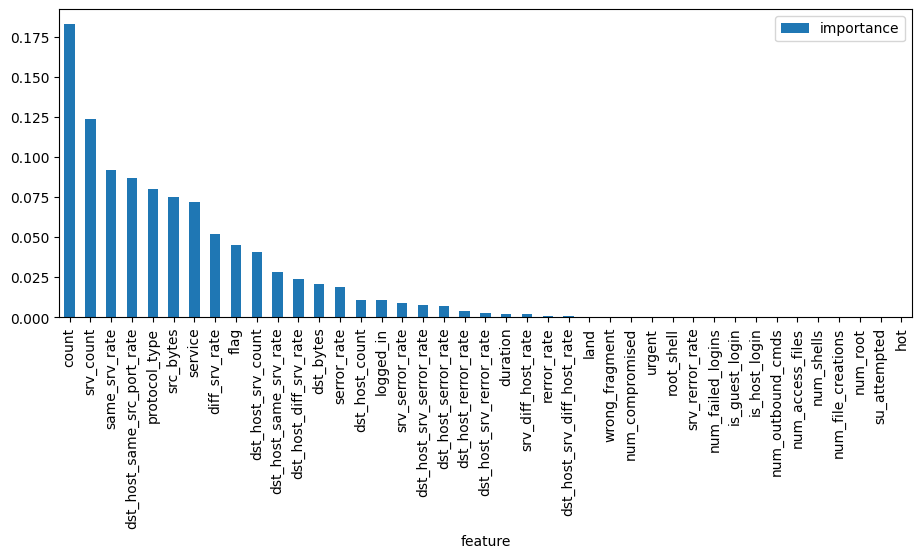

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(x_train, y_train);

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':x_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [ ]:
# filter out unimportant features
# filtered_importances = importances[importances["importance"] >= 0.1]
# filtered_importances.head()

In [ ]:
# take unimportant features out of test data
# x_train[x_train.columns.intersection(filtered_importances.iloc[:, 0])]
# x_train = x_train[x_train.columns.intersection(filtered_importances.iloc[0])]
# x_train.head()

In [ ]:
# format test data
x_test = x_test.reindex(x_train.columns, axis=1)

In [ ]:
from sklearn.svm import SVC
# fit classifier to data
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

# use model to predict attacks from test data
y_pred = classifier.predict(x_test)



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# determine model accuracy
accuracy_score(y_test,y_pred)

Confusion Matrix:
[[21444     0     0]
 [    1 19434     9]
 [    0     5 56161]]


0.9998454468646321

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# print model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9998454468646321


In [ ]:
from sklearn import svm, datasets

# iris = datasets.load_iris()
# x = iris.data[:, :2]
# y = iris.target

x = x_train.iloc[:, 0:2].max()
xmin = x_train.iloc[:, 0:2].min()
y = y_train

print(x)
print(xmin)

duration      94.803129
src_bytes    152.807275
dtype: float64
duration    -0.070794
src_bytes   -0.052773
dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


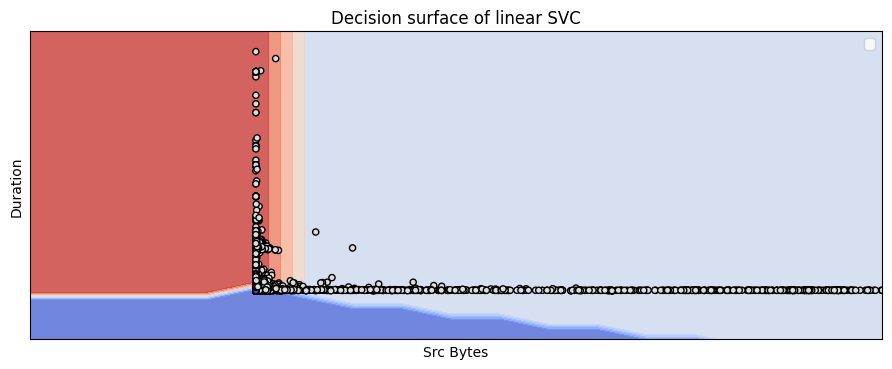

In [ ]:
from sklearn import svm, datasets

# iris = datasets.load_iris()
# x = iris.data[:, :2]
# y = iris.target

x = x_train.iloc[:, 0:2]
y = y_train

def make_meshgrid(x, y, h=0.2):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
  z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  z = z.reshape(xx.shape)
  out = ax.contourf(xx, yy, z, **params)
  return out

from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(x, y.ravel())

fig, ax = plt.subplots()
title = ('Decision surface of linear SVC')
x0, x1 = x.iloc[:, 0], x.iloc[:, 1]
xx, yy = make_meshgrid(x0, x1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(x0, x1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Duration')
ax.set_xlabel('Src Bytes')
ax.set_xticks(())
ax.set_yticks(())
ax.set_xlim(-1,2.5)
ax.set_ylim(-1,5)
ax.set_title(title)
ax.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


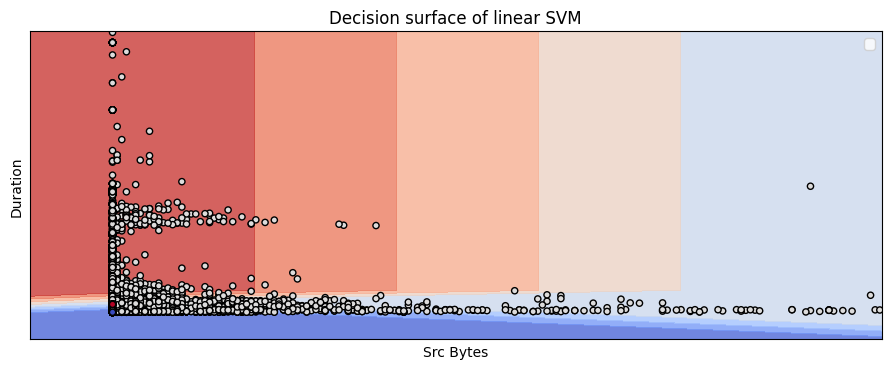

In [ ]:
fig, ax = plt.subplots()
title = ('Decision surface of linear SVM')
x0, x1 = x.iloc[:, 0], x.iloc[:, 1]
xx, yy = make_meshgrid(x0, x1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(x0, x1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('Duration')
ax.set_xlabel('Src Bytes')
ax.set_xticks(())
ax.set_yticks(())
ax.set_xlim(-.1,.2)
ax.set_ylim(-.3,2.5)
ax.set_title(title)
ax.legend()
plt.show()
